In [33]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [25]:
# Load the dataset
data = []
# df1 = pd.read_json("Sarcasm_Headlines_Dataset.json", lines=True)

with open('Sarcasm_Headlines_Dataset.json') as f:
    for line in f:
        data.append(json.loads(line))

# Convert the data to a DataFrame
df = pd.DataFrame(data)
# Display the first few rows to understand the structure
print(df.head())

                                        article_link  \
0  https://www.huffingtonpost.com/entry/versace-b...   
1  https://www.huffingtonpost.com/entry/roseanne-...   
2  https://local.theonion.com/mom-starting-to-fea...   
3  https://politics.theonion.com/boehner-just-wan...   
4  https://www.huffingtonpost.com/entry/jk-rowlin...   

                                            headline  is_sarcastic  
0  former versace store clerk sues over secret 'b...             0  
1  the 'roseanne' revival catches up to our thorn...             0  
2  mom starting to fear son's web series closest ...             1  
3  boehner just wants wife to listen, not come up...             1  
4  j.k. rowling wishes snape happy birthday in th...             0  


In [26]:
# Split the data into features and labels
X = df['headline']
y = df['is_sarcastic']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data into numerical features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [27]:
# Implementing Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# Train a Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predict the labels on the test set
nb_preds = nb_model.predict(X_test_tfidf)

# Evaluate the Naive Bayes model
nb_accuracy = accuracy_score(y_test, nb_preds)
nb_precision = precision_score(y_test, nb_preds)
nb_recall = recall_score(y_test, nb_preds)
nb_f1 = f1_score(y_test, nb_preds)

print(f"Naive Bayes - Accuracy: {nb_accuracy}, Precision: {nb_precision}, Recall: {nb_recall}, F1-Score: {nb_f1}")


Naive Bayes - Accuracy: 0.7811681018345189, Precision: 0.8746021642266073, Recall: 0.5856777493606138, F1-Score: 0.7015573142711259


In [28]:
# Implementing Support Vector Machine (SVM)
from sklearn.svm import SVC

# Train an SVM classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_tfidf, y_train)

# Predict the labels on the test set
svm_preds = svm_model.predict(X_test_tfidf)

# Evaluate the SVM model
svm_accuracy = accuracy_score(y_test, svm_preds)
svm_precision = precision_score(y_test, svm_preds)
svm_recall = recall_score(y_test, svm_preds)
svm_f1 = f1_score(y_test, svm_preds)

print(f"SVM - Accuracy: {svm_accuracy}, Precision: {svm_precision}, Recall: {svm_recall}, F1-Score: {svm_f1}")


SVM - Accuracy: 0.804193186072632, Precision: 0.7920035938903863, Recall: 0.7514919011082694, F1-Score: 0.7712160979877515


In [29]:
# Implementing Logistic Regression
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression classifier
lr_model = LogisticRegression(random_state=42, max_iter=10000)
lr_model.fit(X_train_tfidf, y_train)

# Predict the labels on the test set
lr_preds = lr_model.predict(X_test_tfidf)

# Evaluate the Logistic Regression model
lr_accuracy = accuracy_score(y_test, lr_preds)
lr_precision = precision_score(y_test, lr_preds)
lr_recall = recall_score(y_test, lr_preds)
lr_f1 = f1_score(y_test, lr_preds)

print(f"Logistic Regression - Accuracy: {lr_accuracy}, Precision: {lr_precision}, Recall: {lr_recall}, F1-Score: {lr_f1}")


Logistic Regression - Accuracy: 0.7933358292774242, Precision: 0.8152284263959391, Recall: 0.6845694799658995, F1-Score: 0.7442075996292864


In [34]:
# Print the results for comparison
print("Model Comparison:")

# Naive Bayes
print("Naive Bayes - ")
print(f"    Accuracy:  {nb_accuracy}")
print(f"    Precision: {nb_precision}")
print(f"    Recall:    {nb_recall}")
print(f"    F1-Score:  {nb_f1}")

# Support Vector Machine (SVM)
print("SVM - ")
print(f"    Accuracy:  {svm_accuracy}")
print(f"    Precision: {svm_precision}")
print(f"    Recall:    {svm_recall}")
print(f"    F1-Score:  {svm_f1}")

# Logistic Regression
print("Logistic Regression - ")
print(f"    Accuracy:  {lr_accuracy}")
print(f"    Precision: {lr_precision}")
print(f"    Recall:    {lr_recall}")
print(f"    F1-Score:  {lr_f1}")

Model Comparison:
Naive Bayes - 
    Accuracy:  0.7811681018345189
    Precision: 0.8746021642266073
    Recall:    0.5856777493606138
    F1-Score:  0.7015573142711259
SVM - 
    Accuracy:  0.804193186072632
    Precision: 0.7920035938903863
    Recall:    0.7514919011082694
    F1-Score:  0.7712160979877515
Logistic Regression - 
    Accuracy:  0.7933358292774242
    Precision: 0.8152284263959391
    Recall:    0.6845694799658995
    F1-Score:  0.7442075996292864


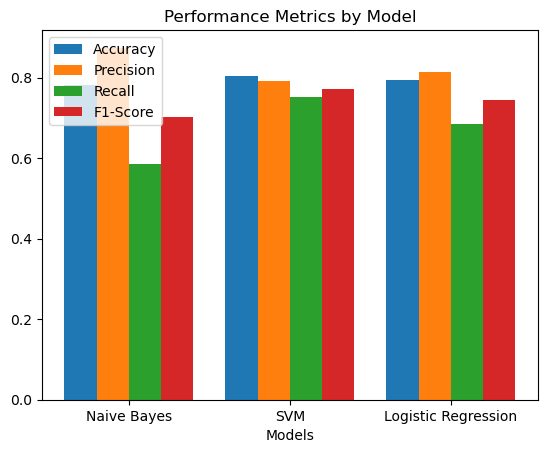

In [31]:
# Graphical Representation
import matplotlib.pyplot as plt
import numpy as np

# Metrics for each model
models = ['Naive Bayes', 'SVM', 'Logistic Regression']
accuracy = [nb_accuracy, svm_accuracy, lr_accuracy]
precision = [nb_precision, svm_precision, lr_precision]
recall = [nb_recall, svm_recall, lr_recall]
f1_score = [nb_f1, svm_f1, lr_f1]

# Plotting the bar chart
x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, precision, width, label='Precision')
rects3 = ax.bar(x + 0.5*width, recall, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, f1_score, width, label='F1-Score')

ax.set_xlabel('Models')
ax.set_title('Performance Metrics by Model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.show()
